In [1]:
import numpy as np
import pandas as pd 
import networkx as nx
import matplotlib.pyplot as plt 
import geopandas as gpd
import osmnx as ox
import itertools as it
%matplotlib inline

# 1. Street Network from OSM using OSMNx

In [45]:
# Street networks from a geocode location.
jalan_jogja = ox.graph.graph_from_place("Kota Yogyakarta, Indonesia", network_type='drive', simplify=True, custom_filter='["highway"~"primary|trunk"]')

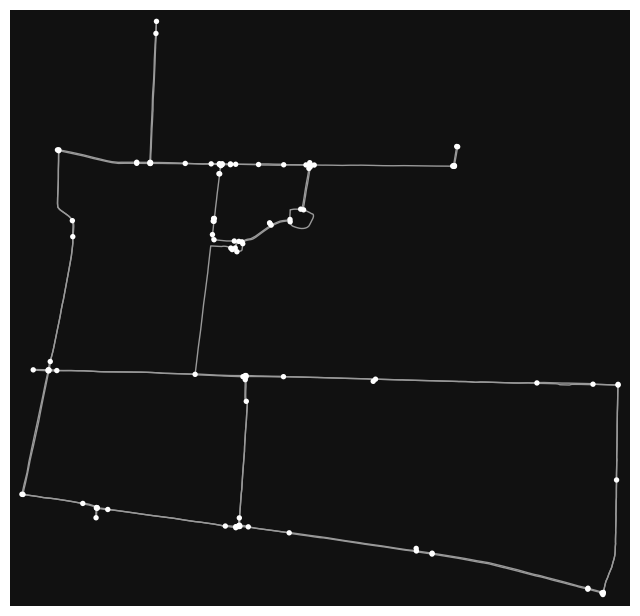

(<Figure size 800x800 with 1 Axes>, <AxesSubplot: >)

In [46]:
# Visualisation
ox.plot_graph(jalan_jogja)

# 2. Origin Destination

## Inputting OD's Geometry

In [5]:
#Pakualaman is not defined in OpenStreetMap, merging the geometry that constitute Pakualaman.
pakualaman = ["Gunung ketur, Kota Yogyakarta, Indonesia","Bausasran, Kota Yogyakarta, Indonesia",
              "Pakualaman, Kota Yogyakarta, Indonesia", 
              "Batas Wilayah RW 02 Kelurahan Gunungketur, Kota Yogyakarta, Indonesia"]
pakualaman = ox.geocode_to_gdf(pakualaman)
pakualaman = pakualaman.dissolve()
pakualaman = pakualaman.replace("Gunung ketur, Yogyakarta, Special Region of Yogyakarta, Indonesia",
                                "Pakualaman, Yogyakarta, Special Region of Yogyakarta, Indonesia")
display(pakualaman)

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((110.37750 -7.79732, 110.37749 -7.797...",-7.797324,-7.804723,110.380675,110.373041,298368056,relation,5615711,-7.801033,110.378709,"Pakualaman, Yogyakarta, Special Region of Yogy...",boundary,administrative,0.77


(427358.0889348225, 434946.5295682836, -867085.2089826264, -858130.7770321547)

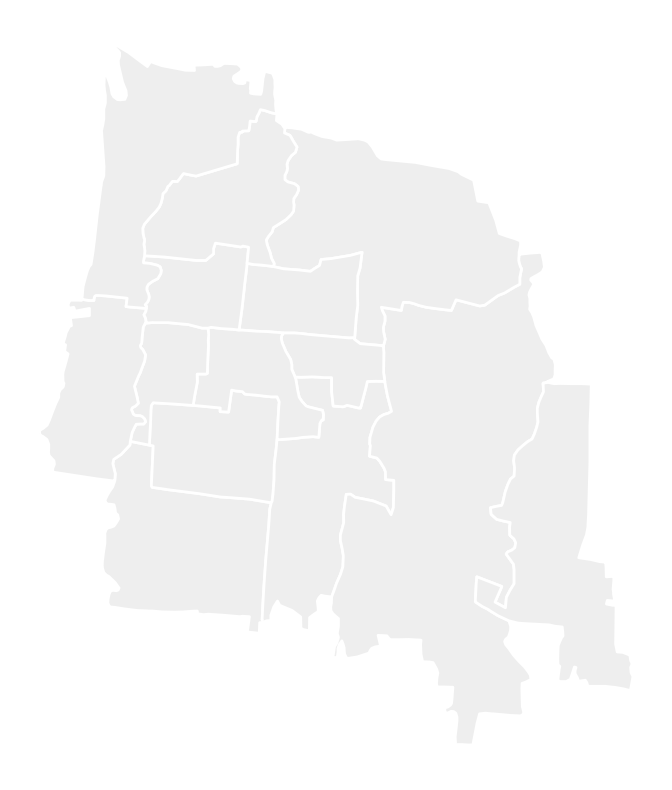

In [6]:
#Other location used as inner OD.
places = ["Mantrijeron, Kota Yogyakarta, Indonesia","Kraton, Kota Yogyakarta, Indonesia",
          "Mergangsan, Kota Yogyakarta, Indonesia","Umbulharjo, Kota Yogyakarta, Indonesia",
          "Kotagede, Kota Yogyakarta, Indonesia","Gondokusuman, Kota Yogyakarta, Indonesia",
          "Danurejan, Kota Yogyakarta, Indonesia", "Gondomanan, Kota Yogyakarta, Indonesia",
          "Ngampilan, Kota Yogyakarta, Indonesia", "Wirobrajan, Kota Yogyakarta, Indonesia",
          "Gedongtengen, Kota Yogyakarta, Indonesia", "Jetis, Kota Yogyakarta, Indonesia",
          "Tegalrejo, Kota Yogyakarta, Indonesia"]

#Polygon of the places.
places = ox.geocode_to_gdf(places)

#Concatenating pakualaman to the data.
places = pd.concat([places.iloc[:7], pakualaman, places.iloc[7:]], ignore_index=True)

places = ox.project_gdf(places)
fig, ax = plt.subplots(figsize=(20, 10))
places.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
ax.axis('off')

In [7]:
places

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((428430.625 -864609.148, 428443.948 -...",-7.808181,-7.828394,110.368682,110.350838,298648438,relation,5615287,-7.818068,110.359723,"Mantrijeron, Yogyakarta, Special Region of Yog...",boundary,administrative,0.730000
1,"POLYGON ((428979.627 -863191.232, 429023.467 -...",-7.802810,-7.814672,110.369540,110.355837,298090170,relation,5615259,-7.808799,110.362726,"Kraton, Yogyakarta, Special Region of Yogyakar...",boundary,administrative,0.590958
2,"POLYGON ((430290.105 -865224.477, 430301.231 -...",-7.801431,-7.828139,110.381610,110.367695,298634048,relation,5615272,-7.814734,110.372558,"Mergangsan, Yogyakarta, Special Region of Yogy...",boundary,administrative,0.730000
3,"POLYGON ((431087.932 -865069.522, 431090.572 -...",-7.788365,-7.840177,110.398656,110.374934,298304383,relation,5615257,-7.814378,110.387374,"Umbulharjo, Yogyakarta, Special Region of Yogy...",boundary,administrative,0.730000
4,"POLYGON ((432769.205 -865013.700, 432852.216 -...",-7.802059,-7.834482,110.406793,110.390184,298074913,relation,5615277,-7.818311,110.397941,"Kotagede, Yogyakarta, Special Region of Yogyak...",boundary,administrative,0.830000
5,"POLYGON ((430338.445 -860804.899, 430349.025 -...",-7.775173,-7.798381,110.395134,110.368194,298247106,relation,5615304,-7.786791,110.381157,"Gondokusuman, Yogyakarta, Special Region of Yo...",boundary,administrative,0.587278
6,"POLYGON ((430022.077 -861852.726, 430034.979 -...",-7.788329,-7.797344,110.378294,110.365310,298613848,relation,5615318,-7.792842,110.371795,"Danurejan, Yogyakarta, Special Region of Yogya...",boundary,administrative,0.575851
7,"POLYGON ((431366.442 -861942.388, 431365.696 -...",-7.797324,-7.804723,110.380675,110.373041,298368056,relation,5615711,-7.801033,110.378709,"Pakualaman, Yogyakarta, Special Region of Yogy...",boundary,administrative,0.770000
8,"POLYGON ((429488.082 -862729.611, 429570.906 -...",-7.796201,-7.808036,110.374193,110.360455,298639993,relation,5615326,-7.802395,110.366112,"Gondomanan, Yogyakarta, Special Region of Yogy...",boundary,administrative,0.575851
9,"POLYGON ((428756.630 -863146.632, 428890.644 -...",-7.795695,-7.808587,110.362104,110.353815,298314418,relation,5615256,-7.802183,110.357603,"Ngampilan, Yogyakarta, Special Region of Yogya...",boundary,administrative,0.574699


Text(0.5, 1.0, 'Titik OD di Kota Yogyakarta')

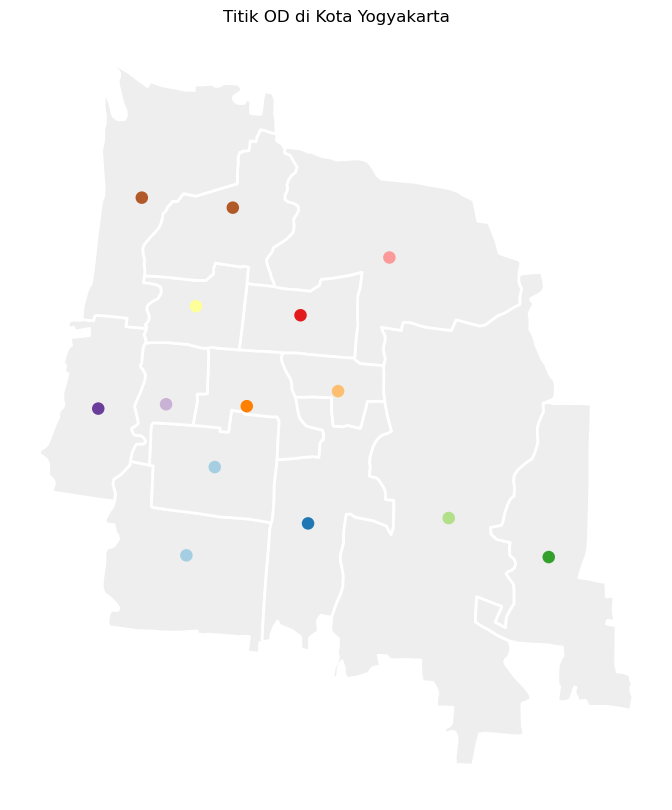

In [8]:
#Centre Point of the OD's polygon.
node_OD = places['geometry'].representative_point()
fig, ax = plt.subplots(figsize=(20, 10))
places.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
node_OD.plot(ax=ax, linewidth=3, alpha=1, cmap="Paired")
ax.axis("off")
ax.set_title("Titik OD di Kota Yogyakarta")

In [9]:
node_OD

0     POINT (429409.473 -864240.163)
1     POINT (429739.193 -863213.434)
2     POINT (430824.107 -863868.687)
3     POINT (432460.072 -863806.409)
4     POINT (433623.124 -864259.946)
5     POINT (431770.234 -860776.253)
6     POINT (430736.497 -861447.869)
7     POINT (431173.462 -862330.384)
8     POINT (430111.643 -862505.440)
9     POINT (429173.235 -862482.926)
10    POINT (428384.421 -862533.483)
11    POINT (429520.852 -861342.383)
12    POINT (429949.168 -860196.847)
13    POINT (428890.868 -860080.432)
dtype: geometry

## Nearest Nodes of each OD

In [10]:
#Finding langitude and latitude from OD's centre point.
X = node_OD.x.values
Y = node_OD.y.values

#Nearest Nodes.
nodes_inner = pd.Series(ox.nearest_nodes(jalan_jogja, X, Y))
display(nodes_inner)
nodes_inner.dtype

0     8478511380
1     8478511380
2     8478511380
3     7311050171
4     8478511380
5     7311050171
6     1720272268
7      270392740
8     8478511380
9     8478511380
10    5634358070
11    1720272268
12    7311050171
13    7311050171
dtype: int64

dtype('int64')

## Same step, only for outer OD

(311271.23004651885, 531461.0512117816, -914449.9946570757, -748115.8121198618)

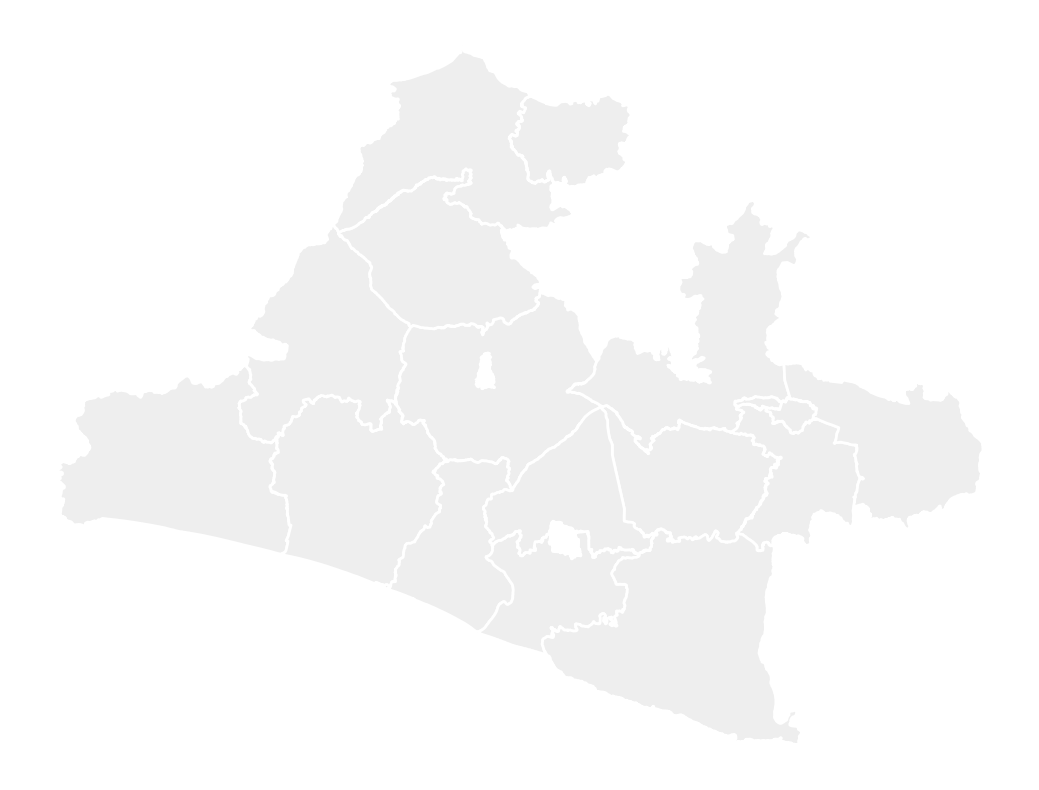

In [11]:
places_outer = ["Kebumen, Jawa Tengah, Indonesia","Purworejo, Jawa Tengah, Indonesia",
          "Wonosobo, Jawa Tengah, Indonesia","Magelang, Jawa Tengah, Indonesia",
          "Boyolali, Jawa Tengah, Indonesia","Klaten, Jawa Tengah, Indonesia",
          "Sukoharjo, Jawa Tengah, Indonesia","Karanganyar, Jawa Tengah, Indonesia",
          "Semarang, Jawa Tengah, Indonesia", "Temanggung, Jawa Tengah, Indonesia",
          "Kendal, Jawa Tengah, Indonesia",
          "Surakarta, Jawa Tengah, Indonesia","Kulon Progo, Daerah Istimewa Yogyakarta, Indonesia",
          "Bantul, Daerah Istimewa Yogyakarta, Indonesia",
          "Kabupaten Gunung Kidul, Daerah Istimewa Yogyakarta, Indonesia",
          "Sleman Regency, Daerah Istimewa Yogyakarta, Indonesia"]

places_outer = ox.geocode_to_gdf(places_outer)

places_outer = ox.project_gdf(places_outer)
fig, ax = plt.subplots(figsize=(20, 10))
places_outer.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
ax.axis('off')

Text(0.5, 1.0, 'Titik OD di Luar Yogyakarta')

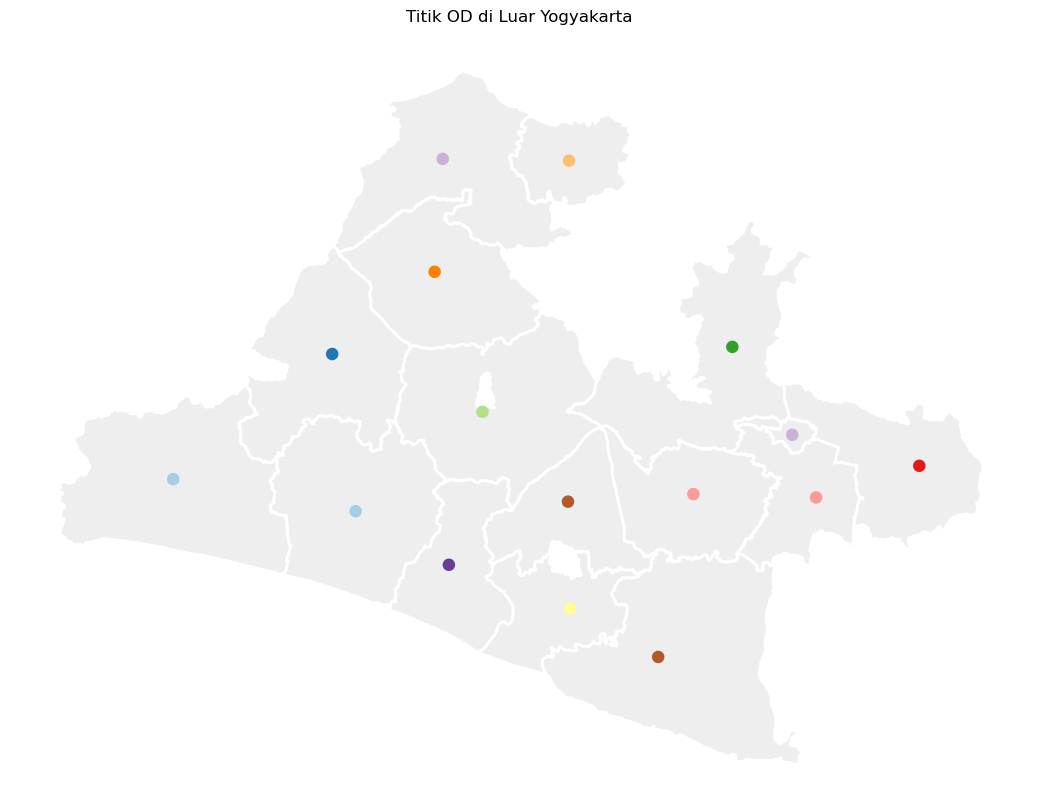

In [13]:
node_OD_outer = places_outer['geometry'].representative_point()
fig, ax = plt.subplots(figsize=(20, 10))
places_outer.plot(ax=ax, facecolor="#eeeeee", edgecolor="white", alpha=1, linewidth=2)
node_OD_outer.plot(ax=ax, linewidth=3, alpha=1, cmap="Paired")
ax.axis("off")
ax.set_title("Titik OD di Luar Yogyakarta")

In [14]:
node_OD_outer

0     POINT (346527.896 -845135.997)
1     POINT (385941.053 -852075.925)
2     POINT (380869.572 -818107.495)
3     POINT (413341.290 -830588.864)
4     POINT (467315.976 -816565.841)
5     POINT (458891.458 -848366.436)
6     POINT (485400.584 -849095.732)
7     POINT (507697.874 -842255.471)
8     POINT (432043.029 -776346.530)
9     POINT (402995.235 -800349.889)
10    POINT (404752.469 -775952.101)
11    POINT (480251.398 -835573.510)
12    POINT (406072.727 -863644.109)
13    POINT (432272.568 -873101.300)
14    POINT (451288.090 -883551.323)
15    POINT (431806.675 -849999.929)
dtype: geometry

In [15]:
X = node_OD_outer.x.values
Y = node_OD_outer.y.values

nodes_outer = pd.Series(ox.nearest_nodes(jalan_jogja, X, Y))
nodes_outer

0     5634358070
1     8478511380
2     7284040691
3     1657072268
4     7311050171
5     8478511380
6     8478511380
7     8478511380
8     7284040691
9     7311050171
10    7311050171
11     270392740
12     270392740
13    7311050171
14     270392740
15    7311050171
dtype: int64

In [16]:
#Concatenate inner and outer ODs
nodes = pd.concat([nodes_inner, nodes_outer], ignore_index=True)

display(nodes)

0     8478511380
1     8478511380
2     8478511380
3     7311050171
4     8478511380
5     7311050171
6     1720272268
7      270392740
8     8478511380
9     8478511380
10    5634358070
11    1720272268
12    7311050171
13    7311050171
14    5634358070
15    8478511380
16    7284040691
17    1657072268
18    7311050171
19    8478511380
20    8478511380
21    8478511380
22    7284040691
23    7311050171
24    7311050171
25     270392740
26     270392740
27    7311050171
28     270392740
29    7311050171
dtype: int64

## OD Matrices

### Tidying OD matrices

In [17]:
OD = pd.read_excel('OD.xlsx',sheet_name='read')
OD.columns = list(range(1,len(OD.index)+1))

### Getting flow from OD

In [18]:
def Flow_from_OD(OD):
    OD.index += 1
    OD.columns = list(range(1,len(OD.index)+1))
    if not len(OD.index) == len(OD.columns):
        raise IndexError(
            (
                "The number of origin and destination must be the same."
            )
        )
    for origin in range(1,len(OD.index)+1):
        for dests in range(1,len(OD.columns)+1):
            if origin == dests:
                yield origin,dests,0
            else:
                flow = OD.iloc[origin-1 ,OD.columns.get_loc(dests)]
                yield origin,dests,flow              

#### Using structured numpy array.

In [19]:
%%time
#using numpy structured array
flow = np.fromiter(Flow_from_OD(pd.read_excel('OD.xlsx',sheet_name='read')), 
                   dtype=[('origin','int64'),('dests','int64'),('flow','int64')])

CPU times: user 151 ms, sys: 52.8 ms, total: 203 ms
Wall time: 326 ms


In [20]:
arus = flow['flow']

In [21]:
arus

array([   0, 1141, 1628, 1438,   99,  885,  262,  132, 1531,  361,  557,
        261,  945,  362,    0,    0,    0,   33,    0,    0,    0,    0,
         33,    0,   33,   33,   66, 3168,   99, 3654,  426,    0,  557,
       1047,  163,  752,  230,   33, 1205,  457,  394,  588,  427,  360,
          0,    0,    0,   33,    0,   33,    0,    0,    0,    0,    0,
         33,   33, 1278,    0, 2516,  460,  720,    0, 2252,  522,  915,
        719,  651, 1725,  196,   98,  196,  523,  163,    0,    0,   33,
         33,    0,   33,    0,    0,    0,    0,    0,  164,   33, 1442,
          0, 2547, 1111,  263, 1958,    0, 2608, 3103, 1178, 1370, 1534,
        197,  296,  426,  947,  360,    0,   66,    0,   33,    0,   66,
         33,    0,    0,   33,    0,  132,  164, 3939,  165, 6240,  263,
          0,  427, 3130,    0,  786,  131,   99,  359,  163,  295,  263,
        197,  230,    0,    0,    0,   33,    0,    0,    0,    0,    0,
          0,    0,   66,  230, 2751,  165, 3166,   

# 3. Speed, Travel Times and Capacity Imputation.

## Speed
The `ox.add_edge_speeds` function add edge speeds (km per hour) to graph as new `speed_kph` edge attributes. Imputes free-flow travel speeds for all edges based on mean `maxspeed` value of edges, per highway type. This mean-imputation can obviously be imprecise, and the caller can override it by passing in `hwy_speeds` and/or `fallback` arguments that correspond to local speed limit standards. See docstring for details.

In [22]:
# impute speed on all edges missing data
jalan_jogja = ox.add_edge_speeds(jalan_jogja)

Kecepatan dapat ditentukan berdasarkan tipe jalan yang ada di openstreetmap

## Travel Times

In [23]:
# calculate travel time (seconds) for all edges
jalan_jogja = ox.add_edge_travel_times(jalan_jogja)

## Lane dan Widths

### Lanes

In [24]:
def add_edge_lanes(G, lanes_min=1):
    """
    Add default lanes towards NaN lanes value in edge attributes.
    It also change lanes column type into numeric.
    
    By default, this imputes 1 lane toward existing NaN values.
    
    Parameters
    ----------
    G : networkX.MultiDiGraph
        input graph
    lanes_min : int
        assigning minimum values to be inserted.
    """
    #Check if lanes_min is integer
    if not isinstance(lanes_min, int):
        raise TypeError(
            (
                "lanes_min type must be an integer."
            )
        )
    
    edges = ox.utils_graph.graph_to_gdfs(G, nodes=False, fill_edge_geometry=False)
    
    #Change all list values in lanes colum into maximum value of lanes
    #in that list.
    edges["lanes"] = [int(max(x)) if isinstance(x, list) else x for x in edges['lanes']]
    
    #Impute missing values with lanes value.
    lanes = (
        edges[["highway", "lanes"]].set_index("highway").iloc[:, 0].fillna(lanes_min)
    )
    edges["lanes"] = lanes.values
    
    #Change lanes column into numeric
    edges['lanes']=pd.to_numeric(edges['lanes'])
    nx.set_edge_attributes(G, values=edges["lanes"], name="lanes")
    
    return G

In [25]:
jalan_jogja = add_edge_lanes(jalan_jogja)

### Width

In [26]:
def add_edge_width(G, width_min=3.5):
    """
    Add default width towards NaN width value in edge attributes.
    
    By default, this imputes 3.5 meters toward existing NaN values.
    
    Parameters
    ----------
    G : networkX.MultiDiGraph
        input graph
    width_min : int
        assigning minimum values to be inserted.
    """
    #Check if width_min is float
    if not isinstance(width_min, (float,int)):
        raise TypeError(
            (
                "width_min type must be an integer or float."
            )
        )
    
    edges = ox.utils_graph.graph_to_gdfs(G, nodes=False, fill_edge_geometry=False)
    
    #Change all list values in lanes colum into maximum value of lanes
    #in that list.
    edges["width"] = [int(max(x)) if isinstance(x, list) else x for x in edges['width']]
    
    #Impute missing values with width value.
    width = (
        edges[["highway", "width"]].set_index("highway").iloc[:, 0].fillna(width_min)
    )
    #Change lanes column into numeric
    edges["width"]=pd.to_numeric(edges["width"])
    edges["width"] = width.values
    nx.set_edge_attributes(G, values=edges["width"], name="width")
    
    return G

In [27]:
jalan_jogja = add_edge_width(jalan_jogja)

## Capacity
Imputing capacity value based on modification of 'ox.add_edge_travel_times()'.
The capacity is based on lane width and lane numbers.
The value used is based on Indonesia's Highway Capacity Manual.
If there is no lane width nor lane numbers, the capacity of the edges is assumed 1650,
the capacity for 1 lane of 3.5m width.

In [28]:
def add_edge_capacity(G, base_capacity=None, fallback=1650):
    """
    Add edge capacity to graph as new "capacity" edge attributes.
    
    By default, this imputes 1650 * number of lane toward existing 
    NaN values.
    
    Parameters
    ----------
    G : networkX.MultiDiGraph
        input graph
    base_capacity : dict
        dict keys = OSM highway types and values = typical capacity
        to assign to edges of that highway type for any edges missing
        capacity data. Any edges with highway type not in `base_capacity` 
        will be assigned the fallback value.
    fallback : numeric
        default capacity value to assign to edges whose highway
        type did not appear in `base_capacity`. Default value is based on
        Indonesian Higway Capacity Manual 1997 (MKJI 1997).
    """
    
    edges = ox.utils_graph.graph_to_gdfs(G, nodes=False, fill_edge_geometry=False)

    # collapse any highway lists (can happen during graph simplification)
    # into string values simply by keeping just the first element of the list
    edges["highway"] = edges["highway"].map(lambda x: x[0] if isinstance(x, list) else x)
    edges["capacity"] = None
    # if user provided base_capacity, use them as default values, otherwise
    # initialize an empty series to populate with fallback values.
    if base_capacity is None:
        capacity_avg = pd.Series(dtype=float).fillna(fallback)
    else:
        capacity_avg = pd.Series(base_capacity).dropna()
    
    # for each highway type that caller did not provide in base_capacity, impute
    # capacity of type by using fallback values
    for cap, group in edges.groupby("highway"):
        if cap not in capacity_avg:
            capacity_avg.loc[cap] = fallback
    
    #Impute missing values with lanes value.
    capacity = (
        edges[["highway", "capacity"]].set_index("highway").iloc[:, 0].fillna(capacity_avg)
    )
    edges["capacity"] = capacity.round(0).values * edges["lanes"]
    nx.set_edge_attributes(G, values=edges["capacity"], name="capacity")
    
    return G

In [29]:
jalan_jogja = add_edge_capacity(jalan_jogja)

## Summary

In [30]:
#Convert networkX graph into GeoDataFrame.
list_jalan = ox.graph_to_gdfs(ox.project_graph(jalan_jogja), nodes=False)

In [31]:
#Flatten the osmid, can happen during simplification.
list_jalan['osmid'] = list_jalan['osmid'].map(lambda x: x[0] if isinstance(x, list) else x)

In [32]:
list_jalan

osmid  oneway  \
u          v          key                       
262855957  7698514133 0     824465136    True   
           7305115594 0     933729436    True   
7698514133 1903473308 0     289505394    True   
7305115594 1527609746 0     131706631    True   
           7698514133 0     824465135    True   
...                               ...     ...   
9169499093 9169499092 0     992448141    True   
9623023261 9169499093 0    1046415018    True   
           1089849641 0    1046415015    True   
9774321109 9171658546 0     942023818    True   
           9171658548 0    1092581570   False   

                                                                      name  \
u          v          key                                                    
262855957  7698514133 0                               Jalan Urip Sumoharjo   
           7305115594 0                                      Jalan Affandi   
7698514133 1903473308 0    [Jalan Urip Sumoharjo, Jalan Jenderal Sudirman]   
7305115594 1527609746 0                                      Jalan Affandi   
           7698514133 0                               Jalan Urip Sumoharjo   
...                                                                    ...   
9169499093 9169499092 0                    Jalan Brigadir Jenderal Katamso   
9623023261 9169499093 0                                                NaN   
           1089849641 0                                                NaN   
9774321109 9171658546 0                                 Jalan Kusumanegara   
           9171658548 0                                 Jalan Kusumanegara   

                           highway reversed    length  speed_kph  travel_time  \
u          v          key                                                       
262855957  7698514133 0    primary    False     8.843       40.0          0.8   
           7305115594 0    primary    False     7.396       40.0          0.7   
7698514133 1903473308 0    primary    False  1352.217       40.0        121.7   
7305115594 1527609746 0    primary    False   189.254       40.0         17.0   
           7698514133 0    primary    False     9.463       40.0          0.9   
...                            ...      ...       ...        ...          ...   
9169499093 9169499092 0    primary    False    76.595       40.0          6.9   
9623023261 9169499093 0    primary    False     6.772       40.0          0.6   
           1089849641 0    primary    False     8.357       40.0          0.8   
9774321109 9171658546 0    primary    False   551.201       40.0         49.6   
           9171658548 0    primary    False   244.832       40.0         22.0   

                           lanes width  capacity  \
u          v          key                          
262855957  7698514133 0        1   3.5      1650   
           7305115594 0        2     5      3300   
7698514133 1903473308 0        3     8      4950   
7305115594 1527609746 0        2     5      3300   
           7698514133 0        1   3.5      1650   
...                          ...   ...       ...   
9169499093 9169499092 0        2     6      3300   
9623023261 9169499093 0        1   3.5      1650   
           1089849641 0        1   3.5      1650   
9774321109 9171658546 0        2    10      3300   
           9171658548 0        1   3.5      1650   

                                                                    geometry  \
u          v          key                                                      
262855957  7698514133 0    LINESTRING (432488.390 -860369.437, 432480.094...   
           7305115594 0    LINESTRING (432488.390 -860369.437, 432488.523...   
7698514133 1903473308 0    LINESTRING (432480.094 -860366.376, 432464.713...   
7305115594 1527609746 0    LINESTRING (432488.523 -860362.085, 432519.084...   
           7698514133 0    LINESTRING (432488.523 -860362.085, 432480.094...   
...                                                                      ...   
91694990

In [25]:
list_jalan.to_excel('list_jalan.xlsx')

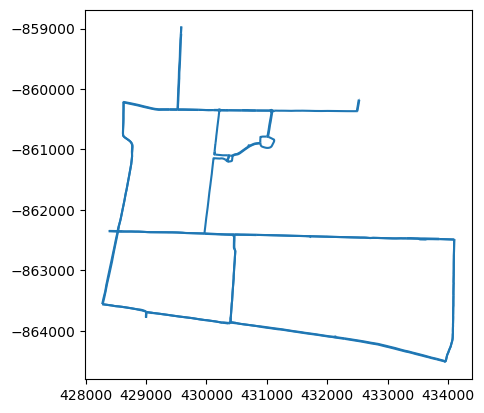

In [33]:
list_jalan.plot()
plt.show()

In [34]:
#Nodes List
list_nodes = ox.graph_to_gdfs(ox.project_graph(jalan_jogja), edges=False)

In [119]:
list_nodes.to_excel('list_nodes.xlsx')

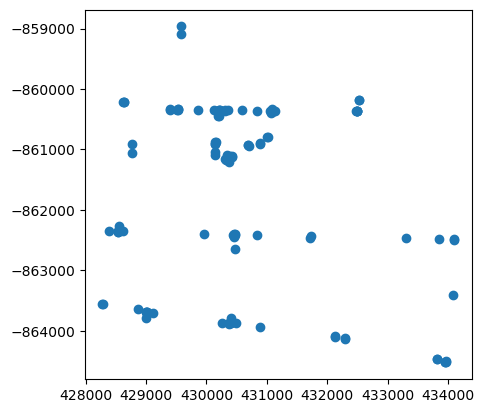

In [35]:
list_nodes.plot()
plt.show()

In [36]:
#Summary of speed, travel time and capacity based on highway type.
list_jalan["highway"] = list_jalan["highway"].astype(str)
list_jalan.groupby("highway")[["lanes","width","length", "speed_kph", "travel_time","capacity"]].mean()

/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_12312/1824533698.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  list_jalan.groupby("highway")[["lanes","width","length", "speed_kph", "travel_time","capacity"]].mean()


,lanes,length,speed_kph,travel_time,capacity
highway,,,,,
primary,2.321637,306.838497,40.0,27.615789,3830.701754
primary_link,1.040000,19.660440,40.0,1.780000,1716.000000


In [37]:
#Summary of the number of highway based on the highway type.
list_jalan.groupby("highway",dropna=False)[["length", "speed_kph", "travel_time","lanes","width"]].size()

highway
primary         171
primary_link     25
dtype: int64

# 4. Shortest Path

## Routing with  OSMNx

### Method 1: Multiprocess Routing

In [38]:
def OD_nodes_list(nodes_OD):
    for index, origin in nodes_OD.items():
        for index, dests in nodes_OD.items():
            yield (origin,dests)

In [39]:
# jalan_jogja.get_edge_data(u, v) -> taking the edge attribute from node u to v

def route_OSMid(routes, k):
    if routes[k] is None:
        return []
    else:
        list_jalan_route = []

        for i in range(len(routes[k])-1):
            jalan = jalan_jogja.get_edge_data(routes[k][i], routes[k][i+1])
            # print(jalan[0]['osmid'])
            list_jalan_route.append(jalan[0]['osmid'])

        return list_jalan_route

In [40]:
def OD_shortest_path(G, nodes_OD):
    nodes = pd.DataFrame(list(OD_nodes_list(nodes_OD)))
    routes = ox.shortest_path(G, nodes.iloc[:,0], nodes.iloc[:,1], weight="travel_time", cpus=None)
    list_jalan_allroutes = []
    for i in range(len(routes)):
        list_jalan_allroutes.append(route_OSMid(routes, i))
    return list_jalan_allroutes

In [41]:
%%time
routes = OD_shortest_path(jalan_jogja, nodes)

CPU times: user 254 ms, sys: 206 ms, total: 460 ms
Wall time: 32.3 s


In [42]:
routes

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [[323933100, 1118797862],
  [131706976,
   323932425,
   324932426,
   323932426,
   159965483,
   821427149,
   561138356,
   484349908,
   561138367],
  898190692,
  263612372,
  25006154,
  [93814144, 25006154, 93814101, 898190685, 898190687],
  [726028973, 357169558],
  809545165,
  [156646365, 809545166],
  156646367,
  24277044,
  [152763512, 24884718],
  1000973935],
 [],
 [],
 [[323933100, 1118797862],
  [131706976,
   323932425,
   324932426,
   323932426,
   159965483,
   821427149,
   561138356,
   484349908,
   561138367],
  898190692,
  263612372,
  25006154,
  [93814144, 25006154, 93814101, 898190685, 898190687],
  1064248077],
 [],
 [],
 [],
 [[323933100, 1118797862],
  [131706976,
   323932425,
   324932426,
   323932426,
   159965483,
   821427149,
   561138356,
   484349908,
   561138367],
  898190692,
  263612372,
  25006154,
  [93814144, 25006154, 93814101, 898190685, 898190687],
  1064248077],
 [],
 [[323933100, 1118797862],
  [1

### Method 2 (alternatives, ignore for now.): Looping single OD pair.

In [34]:
def OD_shortest_path3(G, nodes_OD):
    node_i = len(nodes_OD)
    for orig in range(node_i):
        for dest in range(node_i):
            routes = ox.shortest_path(G, nodes_OD[orig], nodes_OD[dest], weight="travel_time", cpus=None)
            yield routes

In [35]:
def OD_shortest_path2(G, nodes_OD):
    for origin in range(len(nodes_OD)):
        for dests in range(len(nodes_OD)):
            routes = ox.shortest_path(G, nodes_OD[origin], nodes_OD[dests], weight="travel_time", cpus=None)
            yield routes

In [36]:
%%time
routes2 = list(OD_shortest_path2(jalan_jogja, nodes))

CPU times: user 15.1 s, sys: 381 ms, total: 15.5 s
Wall time: 16.4 s


In [37]:
%%time
routes3 = list(OD_shortest_path3(jalan_jogja, nodes))

CPU times: user 15.1 s, sys: 148 ms, total: 15.2 s
Wall time: 16.3 s


In [45]:
# how many total results did we get
print(len(routes))

# and how many were solvable paths
# some will be unsolvable due to directed graph perimeter effects
routes_valid = [r for r in routes if r is not None]
print(len(routes_valid))

900
900


# 5. Maximum Entropy Matrix Estimation

## Maximum Entropy Matrix Estimation

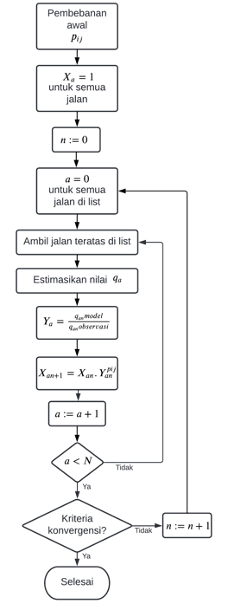

In [ ]:
def ME2(OD):
    n = 0
    if ...:
        
    else:
        n += 1

In [35]:
def calculate_mape(actual, predicted) -> float:
  
    # Convert actual and predicted
    # to numpy array data type if not already
    if not all([isinstance(actual, np.ndarray),
                isinstance(predicted, np.ndarray)]):
        actual, predicted = np.array(actual), 
        np.array(predicted)
  
    # Calculate the MAPE value and return
    return round(np.mean(np.abs((
      actual - predicted) / actual)) * 100, 2)

In [36]:
#Convergence criteria.
def isConvergenceME2(model, observed, percentage=5):
    if calculate_mape(model, observed) >= percentage:
        return True
    else:
        return False

In [37]:
#Data Test drive
actual    = np.array([136, 120, 138, 155, 149])
predicted = np.array([134, 124, 132, 141, 149])

In [38]:
#Test drive
isConvergenceME2(actual, predicted)

False

# 6. User Equilibrium

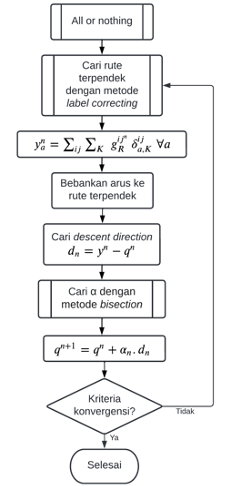

### Initial Shortest Path

In [46]:
routes = OD_shortest_path(jalan_jogja, nodes)

### Total Flow in a Link from Shortest Path

In [47]:
def flatten(xs,y):
    for x in xs:
        if isinstance(x,list):
            yield from flatten(x,y)
        else:
            yield [x,int(y)]

In [48]:
#Temporary list for routes.
def listtemp(routes, flow):  
    for x, y in zip(routes,np.nditer(flow)):
        if isinstance(x, list):
            yield from flatten(x,y)
        elif x == None:
            continue
        else:
            yield [x,int(y)]

In [49]:
#To aggregate all of the flow in each link
def link_total_flow(routes,flow):
    templist = list(listtemp(routes,flow))
    templist = pd.DataFrame(templist,dtype='int64',columns=['osmid','flow'])
    return templist.groupby(['osmid']).sum().squeeze()

## Updating Flow

In [50]:
def updating_flow(gdfs,total_flow):
    #Adding new flow column in edges list.
    gdfs['flow']=np.nan
    gdfs.groupby('osmid').mean()
    # imputing each osm id not included in shortest path with NaN
    for osmid, group in gdfs.groupby("osmid"):
        if osmid not in total_flow:
            total_flow.loc[osmid] = np.nan
    aruss = (
            gdfs[["osmid", "flow"]].set_index("osmid").iloc[:, 0].fillna(total_flow).fillna(0)
            )
    gdfs['flow'] = aruss.values
    return gdfs['flow']

### Updating Travel Time

## Link Performance Function MKJI 1997

In [51]:
#This is a link performance function derived from Indonesia's Highway Manual (MKJI 1997).
def lpr_idn(row):
    if np.isnan(row['flow']):
        return row['travel_time']
    else:
        try:
            return 1/row['speed_kph']*3600/1000*(1+0.79*(row['flow']/row['capacity'])**3.24)
        except ValueError:
            return row['travel_time']

## Bisection Method

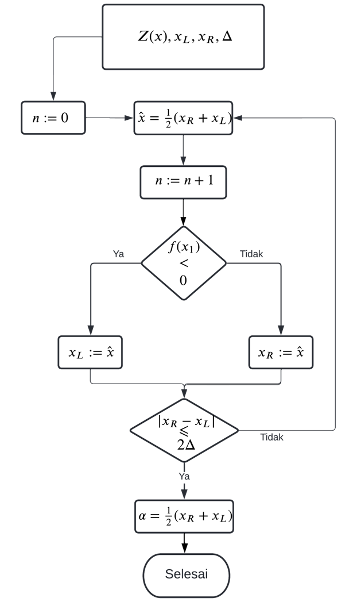

In [52]:
def line_search(row,a):
    return (row['y']-row['q'])*row['t']*(row['q']+a*(row['y']-row['q']))

In [53]:
def bisection(qn,yn,ta,xl=0,xr=1, delta=0.01):
    n=0
    condition = True
    while condition:
        n += 1
        x = (xl+xr)/2
        if pd.DataFrame({'q': qn, 'y': yn, 't':ta}).apply(lambda row: line_search(row,x) , axis=1).sum() <=0:
            xl = x
        else:
            xr = x
        condition = xr-xl > 2*delta
    print(f"the value of alpha is {(xr+xl)/2}")
    return (xr+xl)/2

## User Equilibrium Function

In [54]:
import math

#Integrating all prior code
def user_equilibrium(G, OD_file, ODnodes, k=0.99):
    routes = OD_shortest_path(G, ODnodes)
    flow = np.fromiter(Flow_from_OD(OD_file), dtype=[('origin','int64'),('dests','int64'),('flow','int64')])
    arus = flow['flow']
    #Convert networkX graph into GeoDataFrame.
    list_jalan = ox.graph_to_gdfs(ox.project_graph(jalan_jogja), nodes=False)
    #Flatten the osmid, can happen during simplification.
    list_jalan['osmid'] = list_jalan['osmid'].map(lambda x: x[0] if isinstance(x, list) else x)
    #Create flow series to be used as main flow list.
    list_jalan['flow'] = updating_flow(list_jalan.copy(), link_total_flow(routes,arus))
    n = 0
    condition = True
    while condition:
        n += 1
        #Update Travel Time
        list_jalan['travel_time']= list_jalan.apply(lambda x: lpr_idn(x), axis=1)
        #Set graph's travel time attribute into the newer one
        nx.set_edge_attributes(G, values=list_jalan['travel_time'],name='travel_time')
        routes = OD_shortest_path(G, ODnodes)
        aux_flow = updating_flow(list_jalan.copy(), link_total_flow(routes,arus))
        alpha = bisection(list_jalan['flow'],aux_flow, list_jalan['travel_time'])
        main_flow_old = list_jalan['flow'].copy()
        list_jalan['flow'] = list_jalan['flow'] + alpha * (aux_flow - list_jalan['flow'])
        condition = math.sqrt(((list_jalan['flow'] - main_flow_old)**2).sum())/main_flow_old.sum() < k
        print(f"Criteria of convergence is {math.sqrt(((list_jalan['flow'] - main_flow_old)**2).sum())/main_flow_old.sum()}")
        print(f"Sum of flow is {list_jalan['flow'].sum()}, old flow is {main_flow_old.sum()}")
        print(list_jalan["travel_time"].sum())
    #Update Travel Time
    list_jalan['travel_time']= list_jalan.apply(lambda x: lpr_idn(x), axis=1)
    #Set graph's travel time attribute into the newer one
    nx.set_edge_attributes(G, values=list_jalan['travel_time'],name='travel_time')
    
    return G
    
    

In [ ]:
ue = user_equilibrium(jalan_jogja, pd.read_excel('OD.xlsx',sheet_name='read'), nodes )

/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()
/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()


the value of alpha is 0.9921875
Criteria of convergence is 0.11718217554532977
Sum of flow is 364517571.828125, old flow is 192629527.0
351525142.5958448


/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()


the value of alpha is 0.9921875
Criteria of convergence is 0.061846817813319487
Sum of flow is 198017069.57678223, old flow is 364517571.828125
1350731210.4298954


/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()


the value of alpha is 0.9921875
Criteria of convergence is 0.06282017813111623
Sum of flow is 262933156.7076311, old flow is 198017069.57678223
370416861.48948747


/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()


the value of alpha is 0.9921875
Criteria of convergence is 0.05035701133249598
Sum of flow is 220710242.8883409, old flow is 262933156.7076311
4162871315.714079


/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()


the value of alpha is 0.9921875
Criteria of convergence is 0.06909849492660221
Sum of flow is 282477817.1475651, old flow is 220710242.8883409
367046092.34206325


/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()


the value of alpha is 0.9921875
Criteria of convergence is 0.05059083589403485
Sum of flow is 181363856.91521537, old flow is 282477817.1475651
460216515.43372124


/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()


the value of alpha is 0.9921875
Criteria of convergence is 0.06485773342995561
Sum of flow is 280881284.2102752, old flow is 181363856.91521537
307678143.0364486


/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()


the value of alpha is 0.9921875
Criteria of convergence is 0.07276849375082615
Sum of flow is 305576696.93133026, old flow is 280881284.2102752
1698285281.9392796


/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()


the value of alpha is 0.9921875
Criteria of convergence is 0.06907935158822118
Sum of flow is 267990934.88227603, old flow is 305576696.93133026
4366184488.934948


/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()


the value of alpha is 0.9921875
Criteria of convergence is 0.05543894302581439
Sum of flow is 227515966.5381428, old flow is 267990934.88227603
678934839.8542755


/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()


the value of alpha is 0.9921875
Criteria of convergence is 0.07691995731211031
Sum of flow is 336307577.1448293, old flow is 227515966.5381428
671630830.053706


/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()


the value of alpha is 0.9921875
Criteria of convergence is 0.06974746189613687
Sum of flow is 362115391.8605065, old flow is 336307577.1448293
3148827868.5556116


/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()


the value of alpha is 0.9921875
Criteria of convergence is 0.06333248884506489
Sum of flow is 295944764.56141025, old flow is 362115391.8605065
4536644157.106564


/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()


the value of alpha is 0.9921875
Criteria of convergence is 0.05027306118785032
Sum of flow is 195379765.3871985, old flow is 295944764.56141025
563447914.2093743


/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1275/118596606.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gdfs.groupby('osmid').mean()


the value of alpha is 0.9921875
Criteria of convergence is 0.08003547100443521
Sum of flow is 359512720.52646244, old flow is 195379765.3871985
775845815.8347691


### Input

In [68]:
t = aux2['travel_time']
x = aux2['flow']

NameError: name 'aux2' is not defined

Get Y

In [149]:
#update edges to dummy graph
dummy_jogja = jalan_jogja
nx.set_edge_attributes(dummy_jogja, values=aux2["travel_time"],name='travel_time')

481884335.85120267

In [150]:
%%time
routes = OD_shortest_path(dummy_jogja, nodes)

CPU times: user 9.34 s, sys: 453 ms, total: 9.79 s
Wall time: 24.3 s


In [151]:
%%time
#allroutes but instead of using node id, here we use edge id
list_jalan_allroutes = []

for i in range(len(routes)):
    list_jalan_allroutes.append(route_OSMid(i))

list_jalan_allroutes

CPU times: user 86.8 ms, sys: 4.86 ms, total: 91.6 ms
Wall time: 97.2 ms


[[],
 [],
 [361741808,
  326316449,
  326316449,
  912291074,
  725371331,
  324655689,
  [911102972, 912700645],
  665733617,
  1087420735,
  725371345,
  725371345,
  367379937,
  367379938,
  544448934,
  [208916464, 588525550],
  208916464,
  208916458,
  [588533228, 588525549],
  [588525552, 208915195, 588525551],
  588525546,
  217374791,
  217374791,
  955526091,
  955526091,
  217373728,
  217373728,
  217373728,
  [217373728, 397414911],
  725371312,
  725371312,
  208913868,
  589104326,
  589104324,
  589104324,
  326316507,
  [203072108, 326316507, 326316508],
  203072108,
  203072108,
  203072108,
  203072108,
  203072108,
  323932007,
  323932007,
  323932007,
  588906840,
  [588606602, 588513130],
  588513130,
  588513130,
  588513130,
  [588517282, 588517290, 588517276],
  [588517282, 588517285],
  588517285,
  326490206,
  326490206,
  588517295,
  588517294,
  941663775,
  [588517278, 588517279],
  615729419,
  615729419,
  588514128,
  363848890,
  588514130,
  36384

In [152]:
%%time
templist = list(listtemp(list_jalan_allroutes,arus))
templist = pd.DataFrame(templist,dtype='int64',columns=['osmid','flow'])
templist

CPU times: user 140 ms, sys: 52.5 ms, total: 193 ms
Wall time: 255 ms


,osmid,flow
0,361741808,1628
1,326316449,1628
2,326316449,1628
3,912291074,1628
4,725371331,1628
...,...,...
95598,587402640,0
95599,587402640,0
95600,588273161,0
95601,588273162,0


In [153]:
#Adding new flow column in edges list.
dummy_jalan['flow']=np.nan
dummy_jalan['flow']

u            v            key
262855957    7698514133   0     NaN
             7305115594   0     NaN
7698514133   1264446512   0     NaN
7305115594   1527609746   0     NaN
             7698514133   0     NaN
                                 ..
10076658464  10076658463  0     NaN
10079030142  10079030141  0     NaN
10079585805  10079585803  0     NaN
10088696207  10088696206  0     NaN
10093718312  10093718311  0     NaN
Name: flow, Length: 15481, dtype: float64

In [154]:
%%time
aggtemplist = templist.groupby(['osmid']).sum().squeeze()
display(aggtemplist)
type(aggtemplist)

osmid
24795610      10998
25006119       4157
25006122       1380
25006154      26075
25006156       4157
              ...  
1096212689    59248
1096212691    26075
1102755811    15402
1103079708    59248
1103079709    59248
Name: flow, Length: 482, dtype: int64

CPU times: user 12.9 ms, sys: 7.3 ms, total: 20.2 ms
Wall time: 19.9 ms


pandas.core.series.Series

In [155]:
list_jalan_auxiliary = dummy_jalan.copy()

In [161]:
list_jalan_auxiliary.groupby("osmid").mean()

/var/folders/jk/n32r913j5xzfnsscg2437xnm0000gn/T/ipykernel_1261/2717304416.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  list_jalan_auxiliary.groupby("osmid").mean()


,oneway,length,speed_kph,travel_time,lanes,capacity,flow
osmid,,,,,,,
24277036,1.0,95.152400,40.0,8.580000,1.0,1650.0,0.0
24277044,1.0,8.966000,40.0,0.800000,1.0,1650.0,0.0
24277046,1.0,78.604000,40.0,7.100000,1.0,1650.0,0.0
24795475,1.0,244.001000,40.0,22.000000,1.0,1650.0,0.0
24795476,0.0,206.041333,40.0,18.533333,2.0,3300.0,0.0
...,...,...,...,...,...,...,...
1103801107,0.0,56.905000,30.0,6.800000,1.0,1650.0,0.0
1104600319,0.0,106.905000,30.0,12.800000,1.0,1650.0,0.0
1104602816,0.0,54.791000,30.0,6.600000,1.0,1650.0,0.0


In [162]:
%%time
# imputing each osm id not included in shortest path with NaN
for osmid, group in list_jalan_auxiliary.groupby("osmid"):
    if osmid not in aggtemplist:
        aggtemplist.loc[osmid] = np.nan
aruss = (
        list_jalan_auxiliary[["osmid", "flow"]].set_index("osmid").iloc[:, 0].fillna(aggtemplist).fillna(0)
        )
list_jalan_auxiliary['flow'] = aruss.values
list_jalan_auxiliary['flow'].count()

CPU times: user 7.05 s, sys: 145 ms, total: 7.19 s
Wall time: 9.97 s


15481

In [165]:
#sanity check (Done!)
print(aux2['flow'].sum())
list_jalan_auxiliary['flow'].sum()

208882011.0


354063155.0

In [166]:
y = list_jalan_auxiliary['flow']

In [171]:
%%time
bisection_test = bisection(x,y,t)

CPU times: user 568 ms, sys: 14.8 ms, total: 583 ms
Wall time: 603 ms


In [172]:
bisection_test

0.75

# 7. Validation Test

## Method 1: Scalable Quality Value Method

In [52]:
#MGEH
def mgeh(arr_obs, arr_model):
    return np.sqrt(np.square(arr_model-arr_obs)/arr_obs)

#scaling factor
def scaling_factor(arr_obs):
    return np.ma.average(arr_obs)

#normal sqv
def n_sqv(arr_obs, arr_model, arr_corr=1):
    if type(arr_corr) is np.ndarray:
        arr_corr=arr_corr/arr_obs
    return 1/(1+np.sqrt(np.square(arr_model-arr_obs)/
            (np.ma.average(arr_obs)*arr_obs*arr_corr)))



## Method 2: Root Mean Square Error

In [ ]:
def RMSE(actual,predicted):
    MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
    RMSE = math.sqrt(MSE)
    return RMSE

<b>Integration needed </b>

In [24]:
#SQV standard deviation
std_sqv=mgeh(observed,modeled)*np.sqrt(observed)
print(std_sqv)

[0.1 0.6 0.2 0.4 0.8 1.3 0.2 0.1 0.3 0.2]


In [26]:
#Normal standard deviation
std=np.std(observed)
print(std)

2.8722813232690143


In [30]:
#implicit standard deviation - mgeh standard deviation
np.std(observed)-(mgeh(observed,modeled)*np.sqrt(observed))

array([2.77228132, 2.27228132, 2.67228132, 2.47228132, 2.07228132,
       1.57228132, 2.67228132, 2.77228132, 2.57228132, 2.67228132])

In [41]:
#0+
observed_plus=observed+np.maximum(0,np.std(observed)
                      -(mgeh(observed,modeled)*np.sqrt(observed)))
print(observed)

[ 1  2  3  4  5  6  7  8  9 10]


In [45]:
#Margin of Error
def rSamplingErr(arr_obs,z=1.44):
    return z*np.std(arr_obs)/math.sqrt(len(arr_obs)/np.mean(arr_obs)

SyntaxError: invalid syntax (816697539.py, line 4)

In [46]:
rSamplingErr(observed)

0.23780817326729384

In [48]:
observed_Splus=observed_plus*(1+rSamplingErr(observed))
print(observed_Splus)

[ 4.66936065  5.28826474  7.02119618  8.01144272  8.75412763  9.37303171
 11.97242888 13.33401787 14.32426441 15.6858534 ]


In [58]:
#compate modified n_sqv and manually calculate corrected sqv
print(n_sqv(observed, modeled,observed_Splus))

c_sqv=1/(1+np.sqrt(np.square(modeled-observed)/
            (np.ma.average(observed)*observed_Splus)))
print(c_sqv)

[0.98064899 0.89988476 0.9688193  0.94316561 0.89662553 0.8466972
 0.97594622 0.9884576  0.96730603 0.97892137]
[0.98064899 0.89988476 0.9688193  0.94316561 0.89662553 0.8466972
 0.97594622 0.9884576  0.96730603 0.97892137]


# 8. Visualisation

## Desireline